<a href="https://colab.research.google.com/github/SayNoToMustache/sber_hw_bmla/blob/main/%D0%9B%D0%B8%D1%82%D0%B2%D0%B8%D0%BD%D0%BE%D0%B2_%224_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B1%D0%B5%D0%B7_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D1%8F%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## О задании
В этом задании вы будете обучать модель K-means на синтетических данных для кластеризации объектов и подбирать оптимальное число кластеров.

### Формат сдачи
Данное задание сдаётся через [эту гугл форму](https://forms.gle/Cg6WhRUq57DjYwJt7). Не забудьте открыть доступ по ссылке к файлу (справа сверху "Поделиться" или "Share")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Создадим синтетические данные

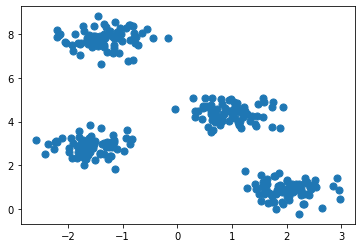

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.4, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

**Вопрос.** Сколько кластеров выделяется на графике?

<u>**Ответ**</u>: 4 видно, а возможно и больше или меньше

**Вопрос.** Какая задача машинного обучения будет решаться (классификация, регрессия, кластеризация)?

<u>**Ответ**</u>: кластеризации

## Моделирование

Обучите модель K-means с числом кластеров `n_clusters=2`

In [3]:
from sklearn.cluster import KMeans

In [4]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 

km = KMeans(n_clusters= 2) # экземпляр KMeans
km.fit(X, y_true)

KMeans(n_clusters=2)

Провизуализируем результат кластеризации

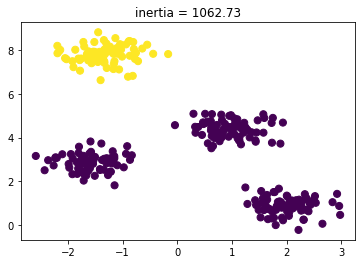

In [5]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=km.labels_)

plt.title(f'inertia = {km.inertia_:.2f}');

#### Подбор гиперпараметров

Видим, что результат не лучший. Попробуем подобрать оптимальное число кластеров, воспользовавшись "методом локтя". Для этого сделайте следующее:
1. Сохраните в список `rg` перебираемые значения кластеров
2. Создайте список `inertia`, куда будут сохраняться средние суммы квадратов объектов до центров кластеров
3. В цикле по `rg` обучаете алгоритм K-means с очередным числом кластеров и добавляете в список `inertia` значение в поле `km.inertia_`
4. Постройте график зависимости `inertia` от `rg`, воспользовавшись `plt.plot(rg, inertia)`. Подпишите оси графика и заголовок, воспользовавшись `plt.xlabel`, `plt.ylabel`, `plt.title`
5. В точке резкого перегиба будет лучшее число кластеров. Обучите модель с этим числом кластеров и убедитесь, что число корректное. Для этого повтороно визуализируйте результат кластеризации (воспользовавшись кодом выше)

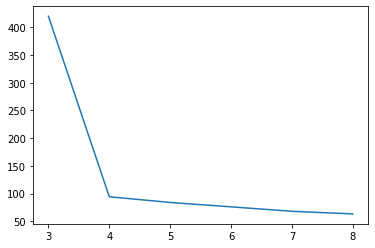

In [6]:
rg = [3, 4, 5, 6, 7, 8]
inertia = []
for i in rg:
  km = KMeans(n_clusters= i)
  km.fit(X, y_true)
  inertia.append(km.inertia_)

plt.plot(rg, inertia)
plt.xlabel = 'rg'
plt.ylabel = 'inertia'
plt.title = 'rg by inertia'
plt.show()

In [7]:
km = KMeans(n_clusters= 4)
km.fit(X, y_true)

KMeans(n_clusters=4)

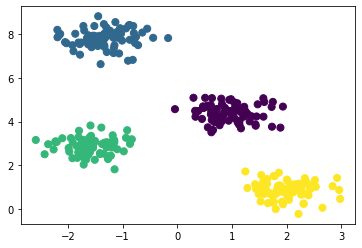

In [8]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=km.labels_)
plt.title = '4 clusters'

**Вопрос.** Проанализируйте полученный график. Какое число кластеров оказалось оптимальным? Совпало ли это число с изначальным предположением?

<u>**Ответ**</u>: Да совпало, оптимальное то, в котором из каждой точки можно попасть в точку этого класса, и кол-во выбросов будет минимальным

Дисперсия между классами максимальна

**(*) Дополнительно.** Попробуйте найти оптимальное число кластеров как аргумент `k` при минимуме функции
$$
Q(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_{k})| } \to \min_{k}
$$
где $J(C_k)$ - это значение в поле `km.inertia_`

**(*) Дополнительно.** Попробуйте найти оптимальное число кластеров, подсчитав метрику силуэта для разного числа кластеров. Какое значение метрики силуэта лучшее? А худшее?

<u>**Ответ**</u>: Лучшее при 4 кластерах - аналогично с "методом локтя". Значение ближе к 1 лучше.

Значение s(i), близкое к 1, означает, что данные сгруппированы надлежащим образом. Если s(i) близко к -1, то i было бы более подходящим, если бы оно было сгруппировано в соседнем кластере. Значение s(i) близкое к нулю означает, что данные находятся на границе двух естественных кластеров.

И силует это максимум по k из s(k). Отсюда можно видеть, что 4 является лучшим, тк это самое близкое к 1 значение среди нашей выборки 

In [9]:
from sklearn.metrics import silhouette_score

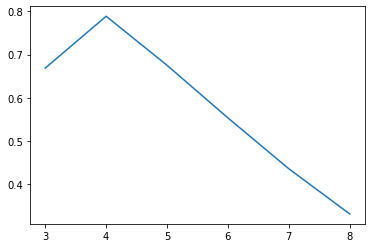

In [54]:
rg = [3, 4, 5, 6, 7, 8]
silh = []
for i in rg:
  km = KMeans(n_clusters= i)
  km.fit(X, y_true)
  silh.append(silhouette_score(X, km.labels_))

plt.plot(rg, silh)
plt.xlabel = 'rg'
plt.ylabel = 'silh'
plt.title = 'rg by silh'
plt.show()

#### Обучение модели с лучшим гиперпараметров

Обучите модель K-means с лучшим найденным числом кластеров

In [ ]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯
# Обучено выше и построена визуализация

In [ ]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN()
eps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
min_samples = [2, 3, 4, 5, 6, 7, 8, 9]
silh = []
for i in eps:
  for j in min_samples:
    dbs = DBSCAN(eps=i, min_samples= j)
    dbs.fit(X, y_true)
    labels = dbs.labels_
    n_noise_ = list(labels).count(-1)
    n_clast_ = len(set(labels)) - (1 if -1 in labels else 0)
    print(f'{i}, {j} Estimated number of clusters:', n_clast_)
    print('Estimated number of noise points:', n_noise_)

In [34]:
dbs = DBSCAN(eps=0.6, min_samples=4)
dbs.fit(X, y_true)
labels = dbs.labels_
uniq_labels = set(labels)

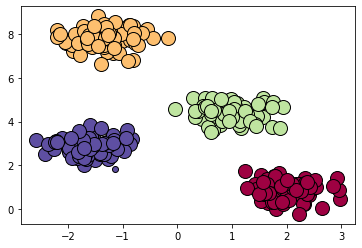

In [41]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(uniq_labels))]
for k, col in zip(uniq_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title = f"Estimated number of clusters: 4"
plt.show()

**(*) Дополнительно.** Попробуйте взять другие алгоритмы кластеризации. Например, [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) или [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Аналогичным образом обучите эти алгоритмы, визуализируйте результаты, подберите лучшие гиперпараметры и обучите с ними эти алгоритмы, после чего переходите к следующему разделу

## Подсчёт метрик

#### Метрика силуэта

Подсчитайте метрику силуэта для алгоритма с лучшими гиперпараметрами. Не забудьте, что данная метрика, первым параметром принимает исходные данные `X`, а вторым - номера кластеров. Подробнее про параметры функции [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

**Примечание:** для получения номеров кластеров для каждого объекта, обратитесь к полю `km.labels_`

In [ ]:
from sklearn.metrics import silhouette_score

In [55]:
km = KMeans(n_clusters= 4)
km.fit(X, y_true)
silh = silhouette_score(X, list(km.labels_))
silh

0.788482667982969

#### V-мера

Помним, что в нашем задаче известны реальные метки классов, хранимые в переменной `y_true`. Посмотрим, как соотносятся метки классов с найденными кластерами. Для этого подсчитаем метрику V-мера для алгоритма с лучшими гиперпараметрами. Не забудьте, что данная метрика принимает метки классов и номера кластеров. Подробнее про параметры функции [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html)

In [57]:
from sklearn.metrics import v_measure_score

In [59]:
vms = v_measure_score(y_true, km.labels_)
vms

1.0

In [61]:
vms_db = v_measure_score(y_true, dbs.labels_)
vms_db

1.0

## Выводы

**Вопрос.** Напишите выводы о проделанной работе. Что было попробовано? Какие результаты получены?

<u>**Ответ**</u>: Сделан K_means и DBSCAN, найдены лучшие параметры при которых получаем лучшую кластеризацию равную 4. Что совпадает с теорией

Проверены метрики по задачам